In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,https://www.zomato.com/bangalore/chats-point-b...,"14/1 5 th Main 2nd Cross, Near BMS Hostel, Bas...",Chats Point,Yes,No,3.4/5,8.0,+91 8660601501,Basavanagudi,Quick Bites,NaN,"Fast Food, Street Food",150,"[('Rated 5.0', 'RATED\n Place for pani puri a...",[],Delivery,Banashankari
387,https://www.zomato.com/bangalore/food-point-ku...,"139, 72nd Cross, Kumaraswamy Layout, Bangalore",Food Point,Yes,No,3.5/5,32.0,+91 9986138782,Kumaraswamy Layout,Quick Bites,NaN,"North Indian, Chinese",300,"[('Rated 2.0', 'RATED\n I ordered for chicken...",[],Delivery,Banashankari
388,https://www.zomato.com/bangalore/swarga-ruchi-...,"65, Parvati Bhavan, Appu Rao Road, Chamaraj Pe...",Swarga Ruchi,Yes,No,3.3/5,10.0,+91 9845912799,Basavanagudi,Quick Bites,NaN,South Indian,200,"[('Rated 1.0', 'RATED\n Worst food ordered ma...","['2 Idly', '3 Poori', 'Masala Dosa', 'Ghee Roa...",Delivery,Banashankari
389,https://www.zomato.com/bangalore/kolkata-king-...,"32, Khaleel Plaza, Opposite Vijaya Collage, RV...",Kolkata King,Yes,No,3.4/5,6.0,+91 7019698036\r\n+91 9740104633,Basavanagudi,Quick Bites,NaN,"Fast Food, Rolls",300,"[('Rated 1.0', ""RATED\n The food wasn't worth...",[],Delivery,Banashankari


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(391, 17)

In [ ]:
df.columns

In [ ]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'listed_in(type)', 'listed_in(city)'], axis=1)

In [ ]:
df.dtypes

In [ ]:
feature_na = [i for i in df.columns if df[i].isnull().sum()>0]
feature_na

In [ ]:
for i in feature_na:
  print(f'{i} has {np.round((df[i].isnull().sum()/len(df[i])*100),4)}% null values')

Changing the datatype from object to float by making changes in the records


In [ ]:
df.rate.unique()

In [ ]:
df.dropna(subset=['rate'],axis=0,inplace=True)

In [ ]:
def split(x):
  return x.split('/')[0].strip() #to remove the spaces from start and ending

In [ ]:
df['rate'] = df['rate'].astype(str).apply(split)

In [ ]:
df.rate

In [ ]:
df.rate.unique()

In [ ]:
df['rate'].replace(['NEW','-'],0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43942 non-null  object
 7   dish_liked                   43942 non-null  object
 8   cuisines                     43942 non-null  object
 9   approx_cost(for two people)  43942 non-null  object
 10  reviews_list                 43942 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [ ]:
df['rate'] = df['rate'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43942 non-null  object 
 7   dish_liked                   43942 non-null  object 
 8   cuisines                     43942 non-null  object 
 9   approx_cost(for two people)  43942 non-null  object 
 10  reviews_list                 43942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


Calculating Average rating


In [ ]:
rating = pd.pivot_table(df,index='name',values='rate')
rating

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


In [ ]:
rating = rating.sort_values(['rate'],ascending=False)
rating[0:15]

,rate
name,
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


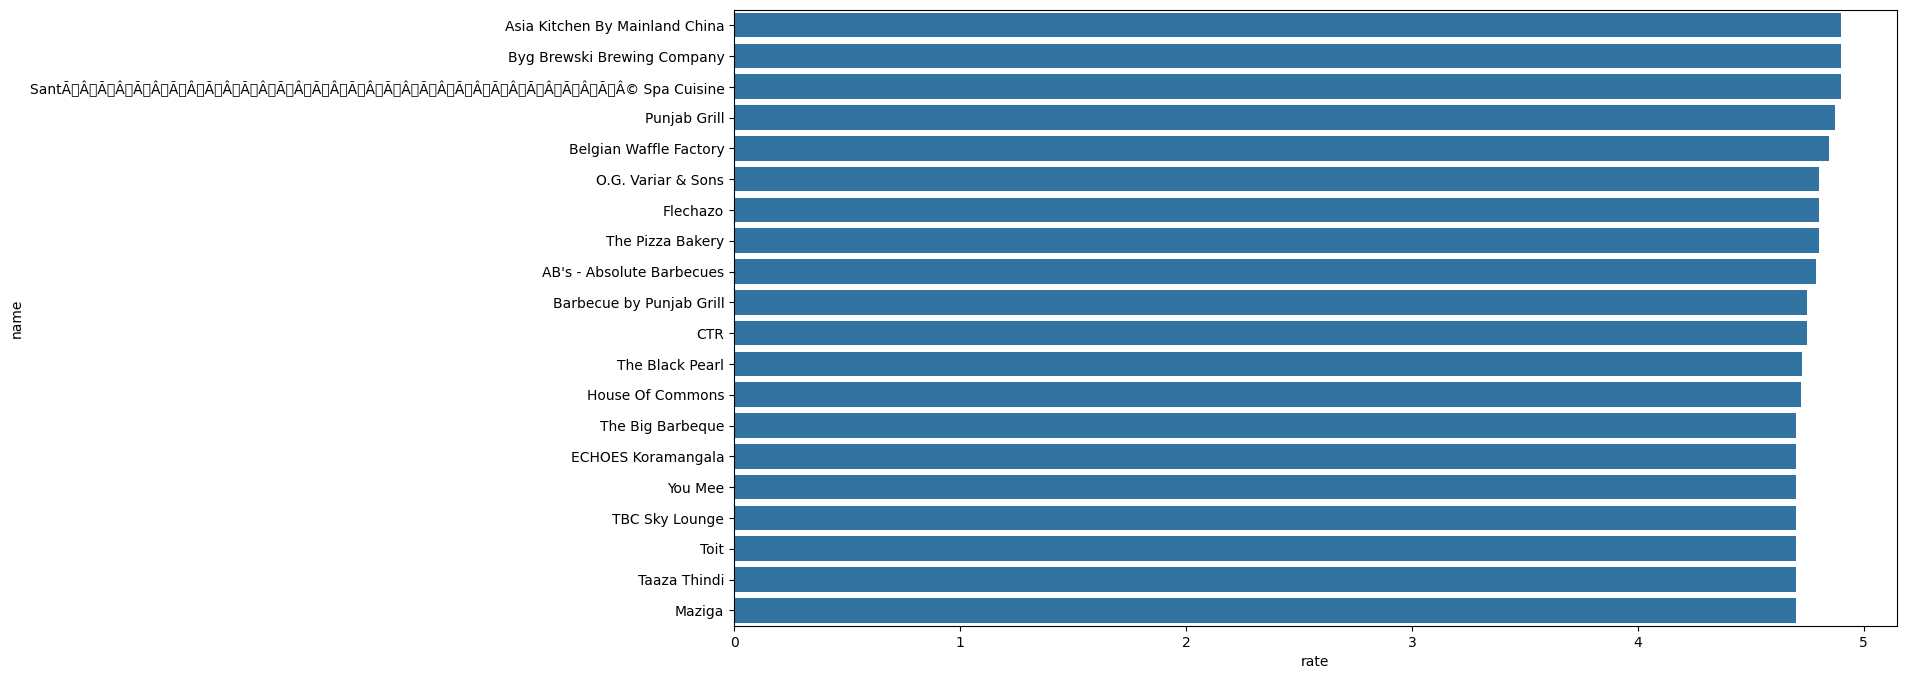

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x=rating[0:20]['rate'], y=rating[0:20].index, orient='h')
plt.show()

dISTRIBUTION OF RATINGS

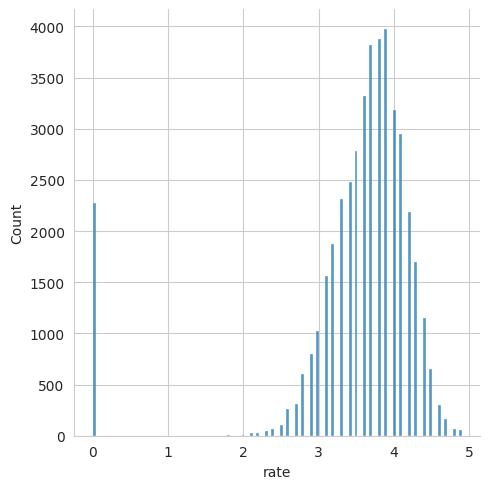

In [ ]:
sns.set_style('whitegrid')
sns.displot(df['rate'])
plt.show()

In [ ]:
from scipy.stats import normaltest
DataToTest = df['rate']
stat,p = normaltest(DataToTest)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p>0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

Statistics=24555.118, p=0.000
Not a Normal Distribution


Top restaurants chains


In [ ]:
df['name'].value_counts()

name
Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: count, Length: 7162, dtype: int64

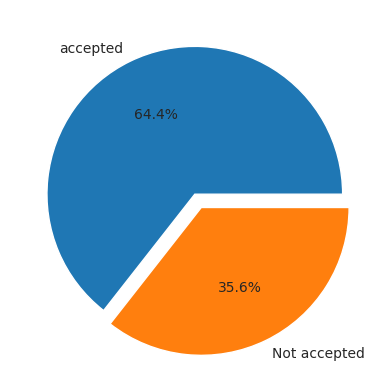

In [ ]:
x = df.online_order.value_counts()
labels = ['accepted','Not accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

<ipython-input-167-b3f792fe0d25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


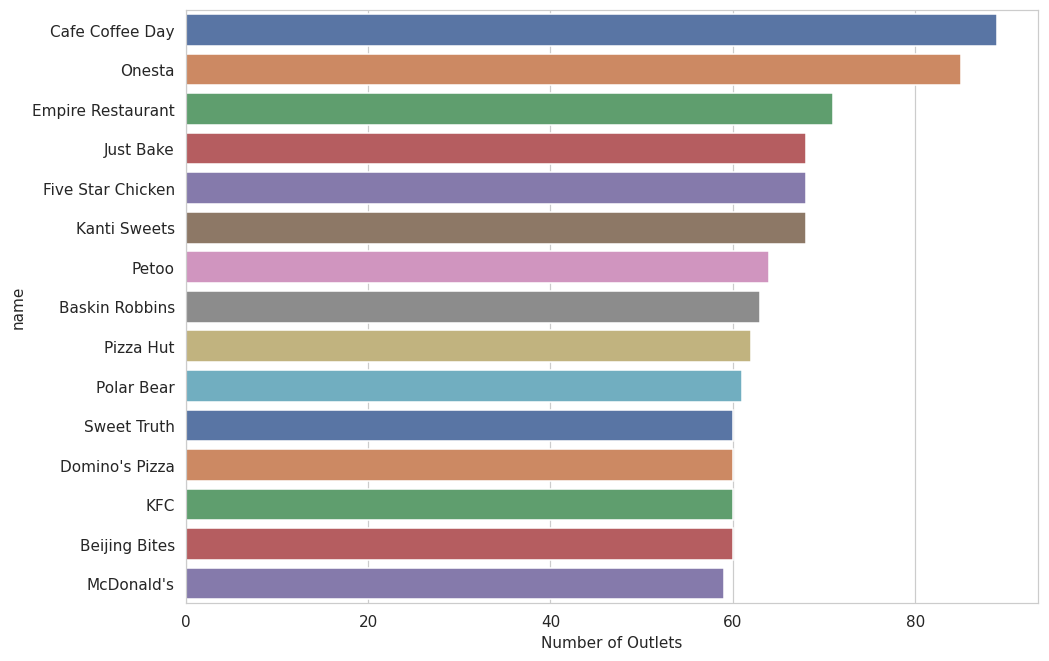

In [ ]:
plt.figure(figsize=(10,7),dpi=110)
chains = df['name'].value_counts()[0:15]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.xlabel('Number of Outlets')

plt.show()

How many restaurants have table booking


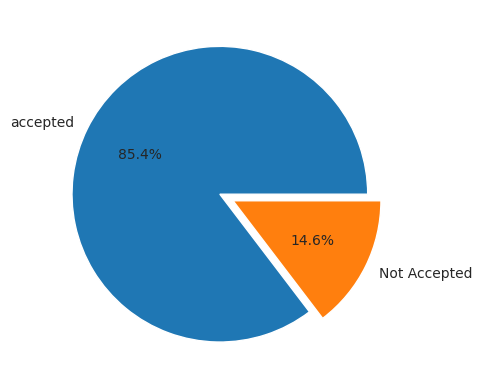

In [ ]:
x = df.book_table.value_counts()
labels = ['accepted','Not Accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

Analysis on type of restraurant

In [ ]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [ ]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [ ]:
len(df.rest_type.unique())

87

In [ ]:
df.rest_type.value_counts()

rest_type
Quick Bites                   15119
Casual Dining                  9969
Cafe                           3538
Dessert Parlor                 1940
Delivery                       1799
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

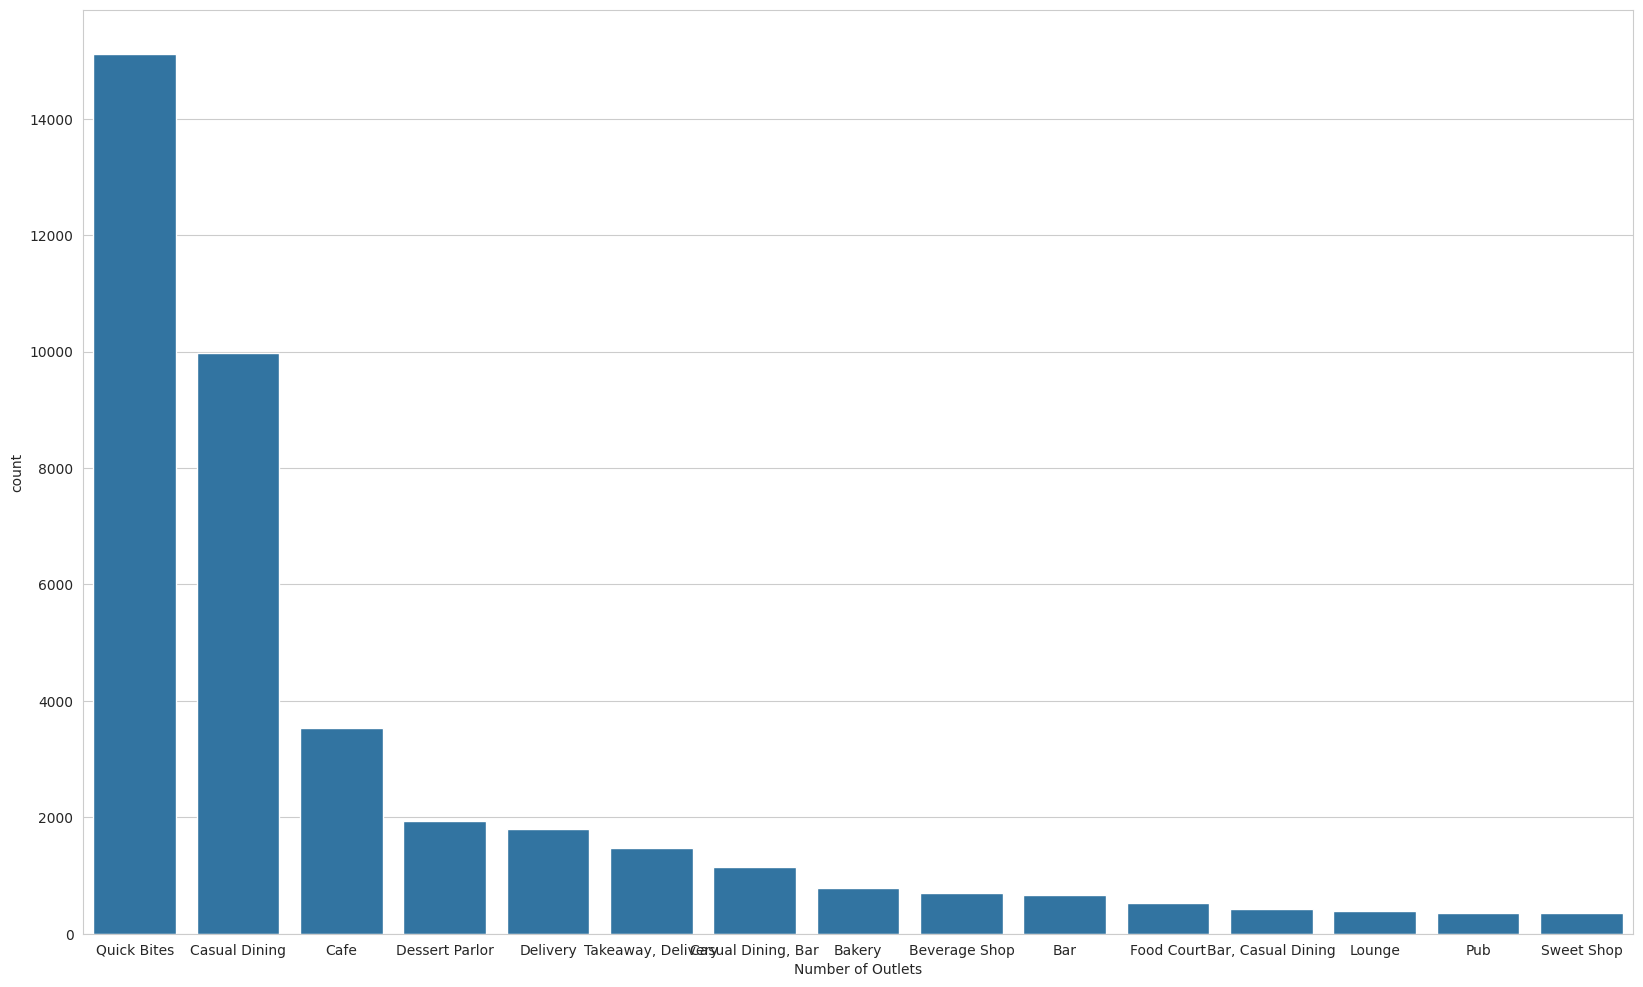

In [ ]:
plt.figure(figsize=(20,12))
rest_typ = df['rest_type'].value_counts()[0:15]
sns.barplot(x=rest_typ.index,y=rest_typ)
plt.xlabel('Number of Outlets')

plt.show()

Which restaurant had the highest voting ?


In [ ]:
voting = df.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [ ]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [ ]:
high_vot = voting[voting['votes']>500]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


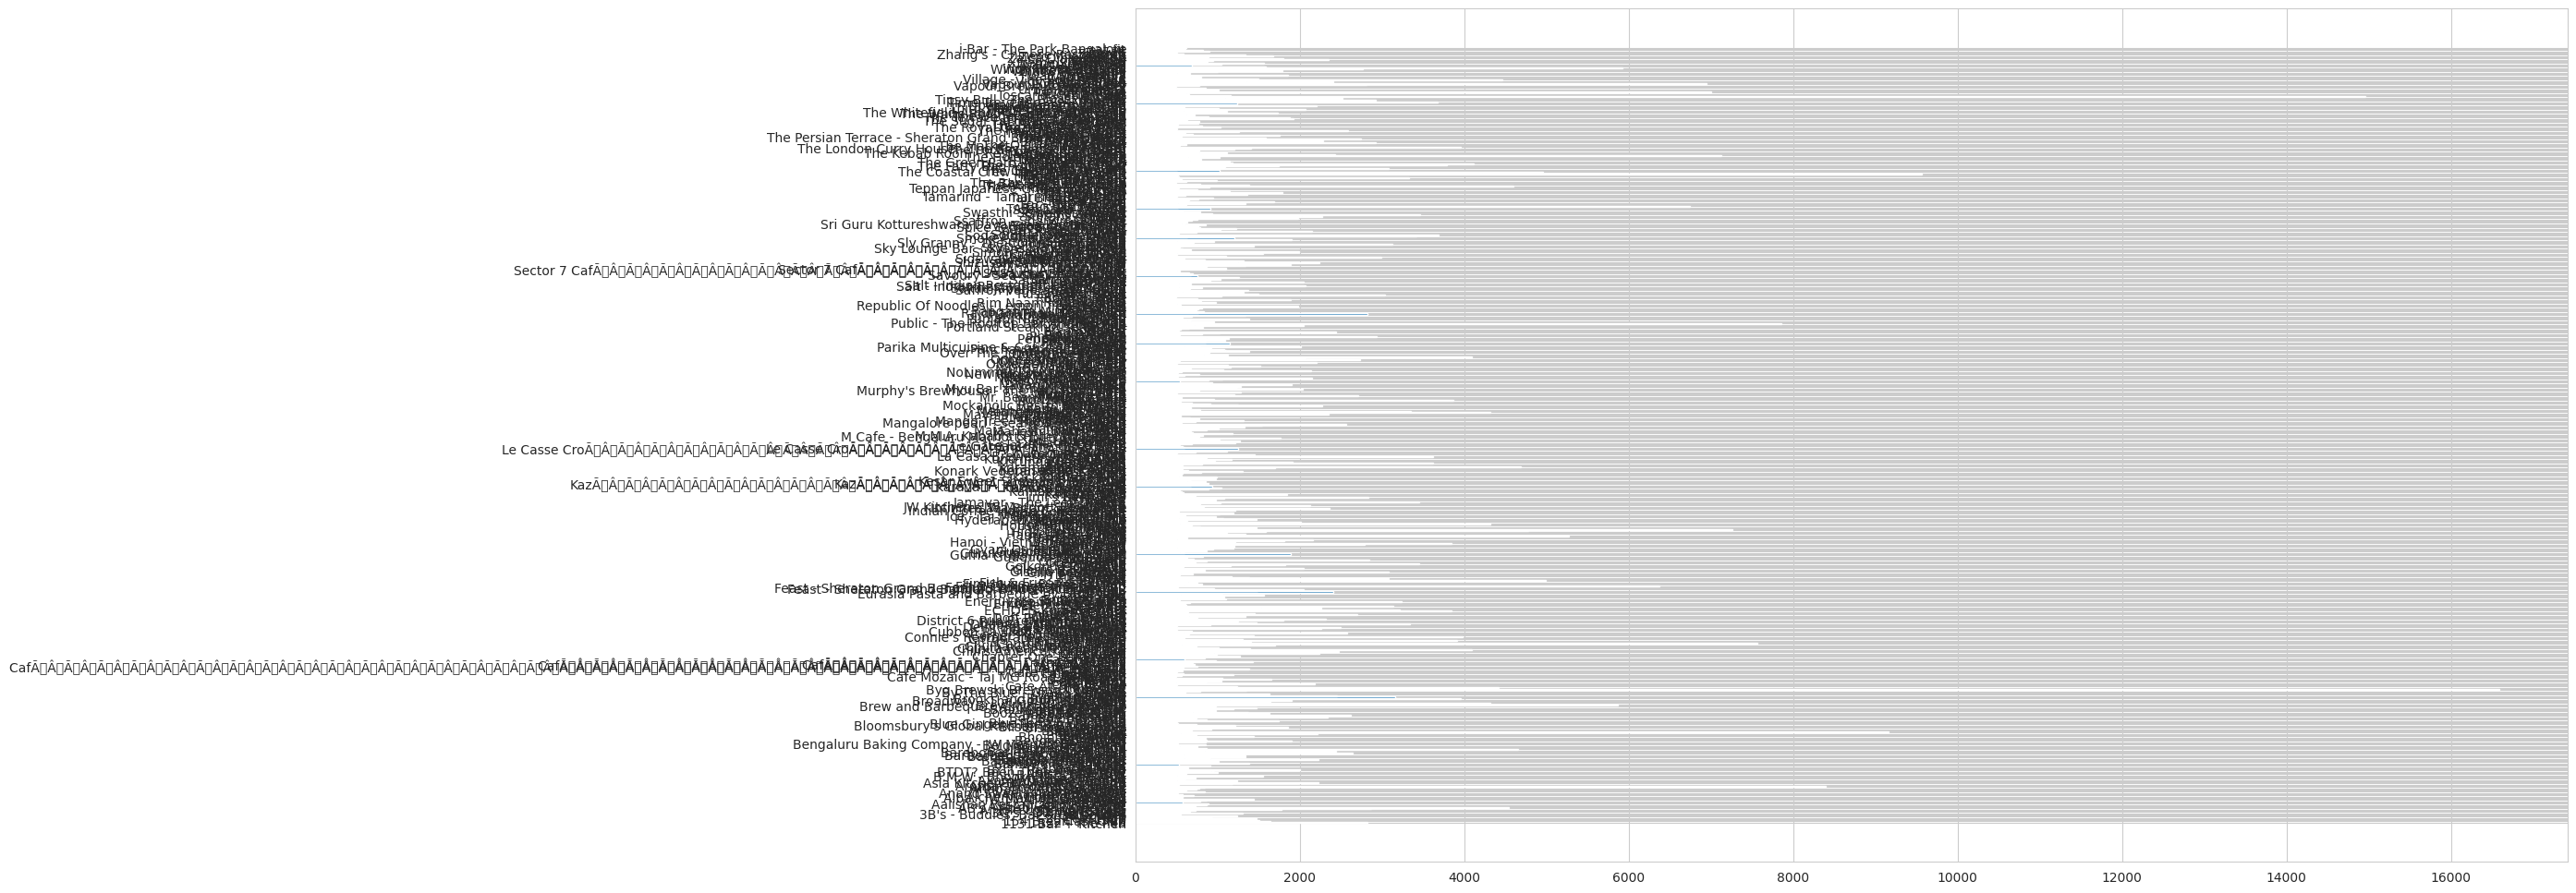

In [ ]:
plt.figure(figsize=(20,12),dpi=100)
plt.barh(high_vot.index,high_vot['votes'])
plt.show()

Lets analyse the highly rated restaurant and worst rated based on number of ratings given

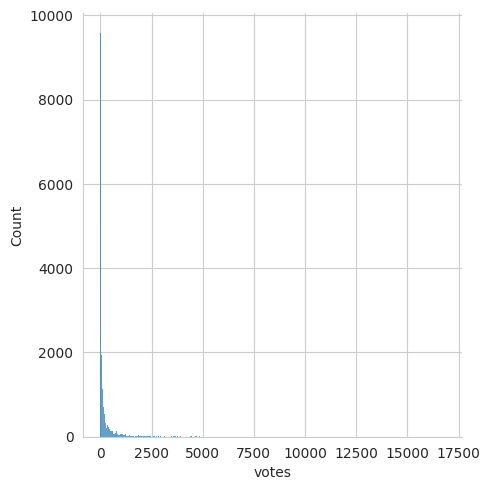

In [ ]:
sns.displot(df['votes'])
plt.show()

In [ ]:
voting_rating = df.groupby('name')[['votes']].mean().sort_values(['votes'],ascending=False)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


In [ ]:
voting_rating['name'] = voting_rating.index


In [ ]:
voting_rating = voting_rating.reset_index(drop=True)
voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [ ]:
voting_rating = pd.merge(voting_rating,df[['rate','name']])
voting_rating.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [ ]:
vote_top = voting_rating[voting_rating['votes']>500]
vote_top

,votes,name,rate
0,16588.500000,Byg Brewski Brewing Company,4.9
1,16588.500000,Byg Brewski Brewing Company,4.9
2,16588.500000,Byg Brewski Brewing Company,4.9
3,16588.500000,Byg Brewski Brewing Company,4.9
4,16588.500000,Byg Brewski Brewing Company,4.9
...,...,...,...
6893,500.538462,Cafe Mondo,3.7
6894,500.538462,Cafe Mondo,3.7
6895,500.538462,Cafe Mondo,3.7
6896,500.538462,Cafe Mondo,3.6


In [ ]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values(['rate'],ascending=False)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
Asia Kitchen By Mainland China,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
Flechazo,4.800000
...,...
Lazeez,3.021429
Go Italia,3.000000
Moriz Restaurant,2.868750


Highest rated restaurants based on most number of votes

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


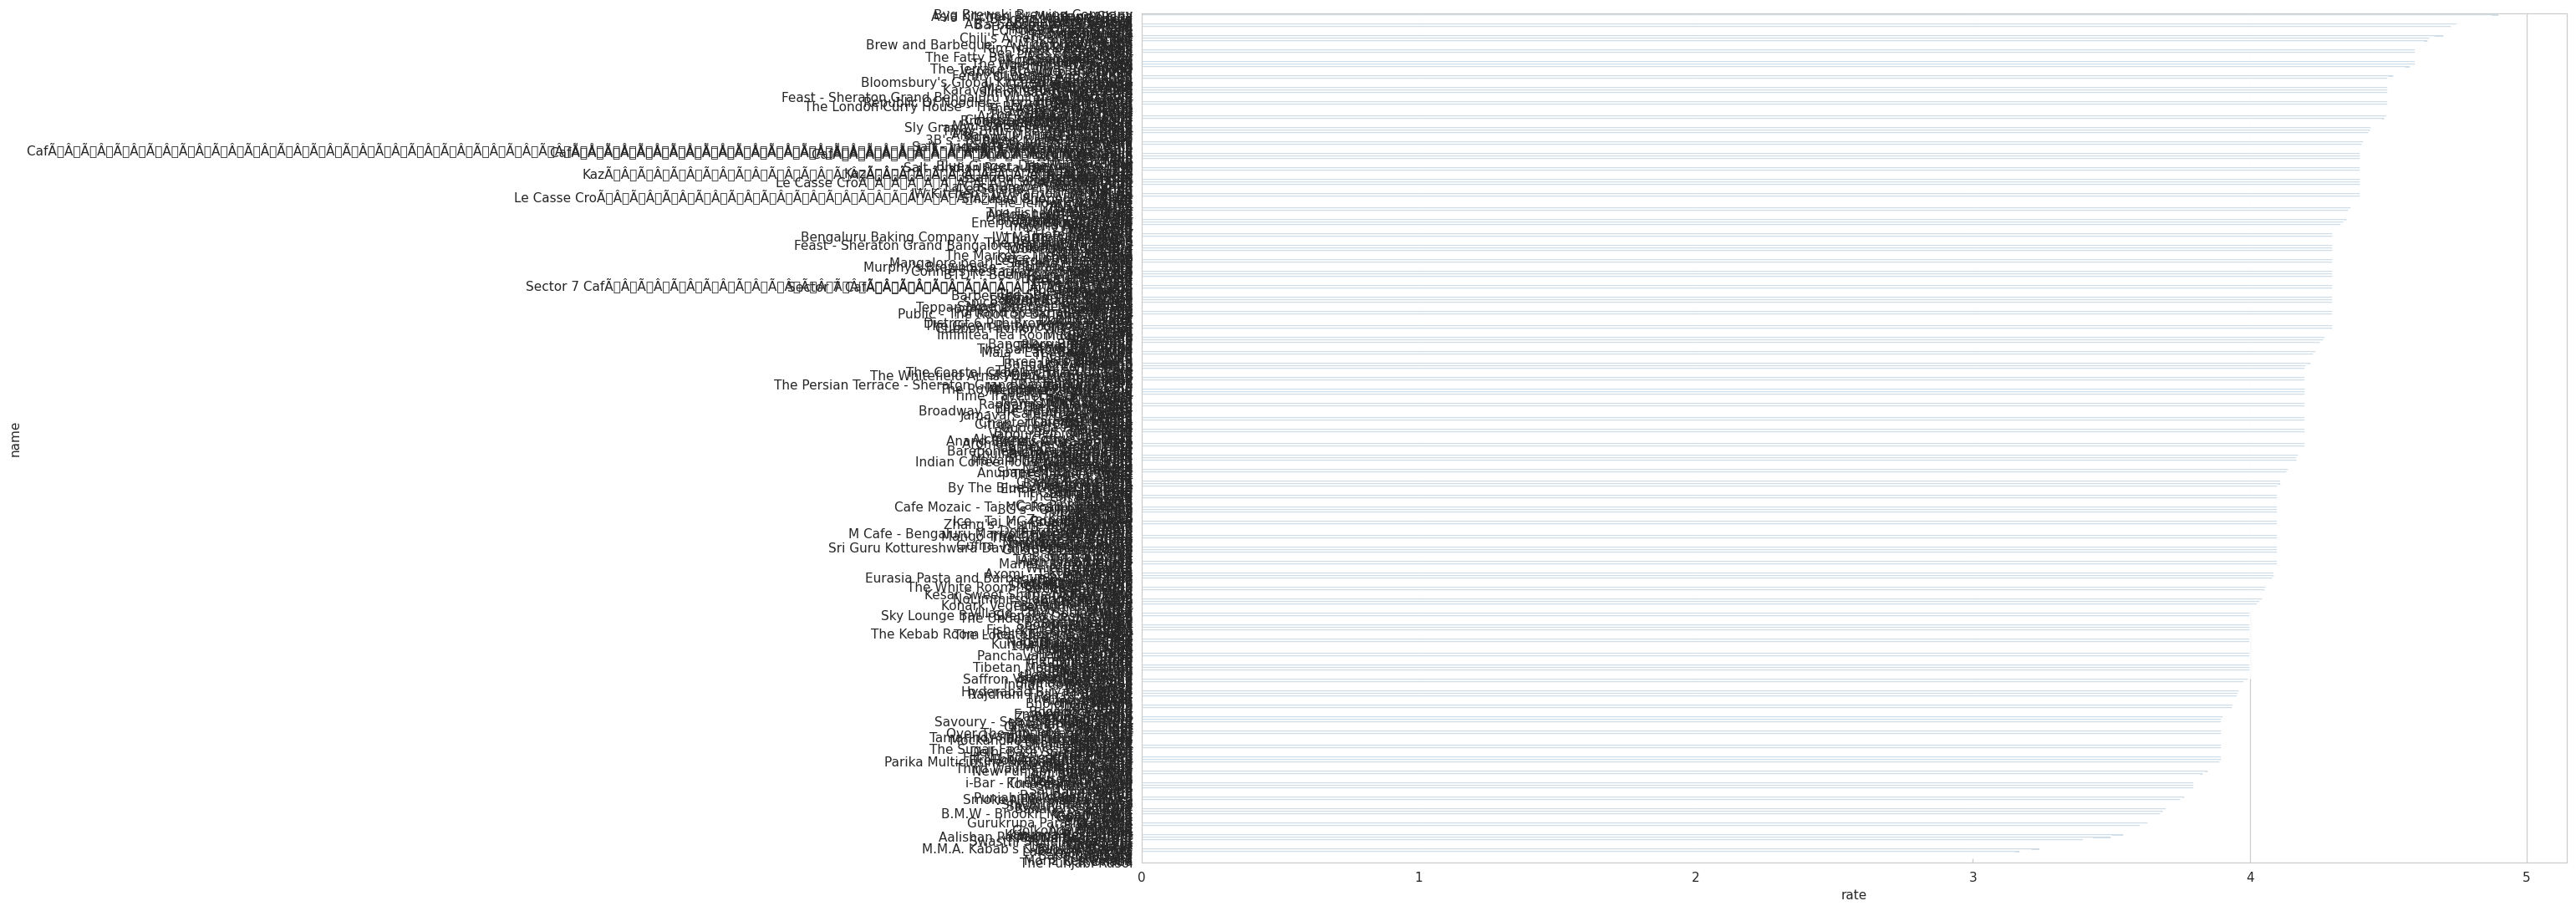

In [ ]:
plt.figure(figsize=(20,12),dpi=110)
sns.barplot(x = vote_top['rate'],y = vote_top.index,orient='h')
plt.show()

In [ ]:
bad_count = voting_rating[(voting_rating['rate']<3) & (voting_rating['votes']>0)]
bad_count

,votes,name,rate
519,3842.595745,Hammered,0.0
520,3842.595745,Hammered,0.0
521,3842.595745,Hammered,0.0
707,3236.732394,Empire Restaurant,0.0
708,3236.732394,Empire Restaurant,0.0
...,...,...,...
42448,0.571429,Davanagere Benne Dosa,0.0
42449,0.571429,Davanagere Benne Dosa,0.0
42450,0.571429,Davanagere Benne Dosa,0.0
42451,0.571429,Davanagere Benne Dosa,0.0


In [ ]:
bad_restaurants = bad_count[bad_count['votes']>500].groupby('name')[['rate']].mean()
bad_restaurants

,rate
name,
Anjappar,2.833333
Baba Chatkora,0.000000
Bathinda Junction,0.000000
Biergarten,0.000000
Brik Oven,0.000000
Cafe Terra,0.000000
Dunkin' Donuts,0.000000
Empire Restaurant,0.000000
FreshMenu,2.800000


In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
dtype: int64

In [ ]:
df = df.fillna(method='ffill')

In [ ]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
dtype: int64

In [ ]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."


In [ ]:
df.describe()

,votes
count,43942.000000
mean,333.430954
std,862.180633
min,0.000000
25%,17.000000
50%,64.000000
75%,254.000000
max,16832.000000


In [ ]:
def find_outlier_IQR(df):
  out=[]
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3-q1
  upper=q3+1.5*IQR
  lower=q1-1.5*IQR
  for i in df:
    if i>upper or i<lower:
      out.append(i)
  return out